In [1]:
import networkx as nx
import numpy.linalg
import matplotlib.pyplot as plt
import numpy as np
import csv

# create network object from CSV
ToykoNetwork = nx.empty_graph()
with open("Tokyo.csv", "r") as csvFile:
    csvReader = csv.reader(csvFile)
    next(csvReader, None)
    for row in csvReader:
        ToykoNetwork.add_edge(row[0],row[1])
        
#nx.draw(Graph)

## Centralities

### Degree Centrality

Text(0, 0.5, '# of Nodes')

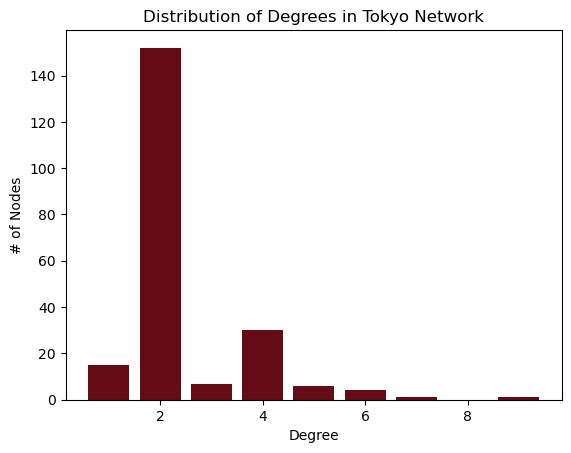

In [3]:
# gather a list of all the degrees
degreeSequence = sorted((d for n, d in ToykoNetwork.degree()), reverse=True)

# show as a bar plot 
plt.bar(*np.unique(degreeSequence, return_counts=True), color='#640B15')
plt.title("Distribution of Degrees in Tokyo Network")
plt.xlabel("Degree")
plt.ylabel("# of Nodes")

### Closeness Centrality

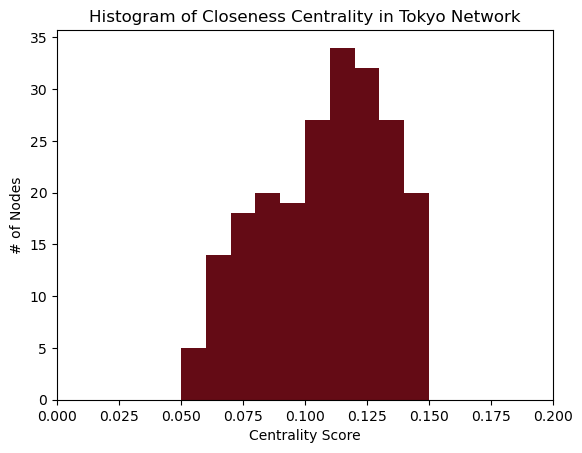

In [4]:
closenessCentrality = nx.closeness_centrality(ToykoNetwork)
inside = [(f"{c:0.2f}",v) for v,c in closenessCentrality.items()]

#plot centrality
xs = [float(x) for x,y in inside]
plt.hist(xs, bins=10, color='#640B15')
plt.xlim(0,0.2)
plt.title("Histogram of Closeness Centrality in Tokyo Network")
plt.xlabel("Centrality Score")
plt.ylabel("# of Nodes")
plt.show()


### Betweeness Centrality

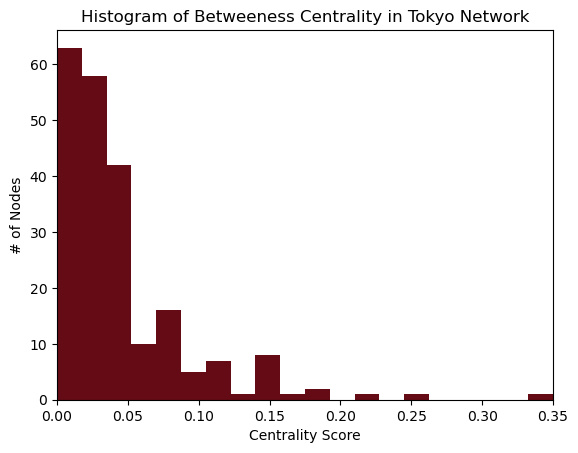

In [5]:
betweenessCentrality = nx.betweenness_centrality(ToykoNetwork)
inside = [(f"{c:0.2f}",v) for v,c in betweenessCentrality.items()]

#plot centrality
xs = [float(x) for x,y in inside]
plt.hist(xs, bins=20, color='#640B15')
plt.xlim(0,.35)
plt.title("Histogram of Betweeness Centrality in Tokyo Network")
plt.xlabel("Centrality Score")
plt.ylabel("# of Nodes")
plt.show()

### Eigenvector Centrality

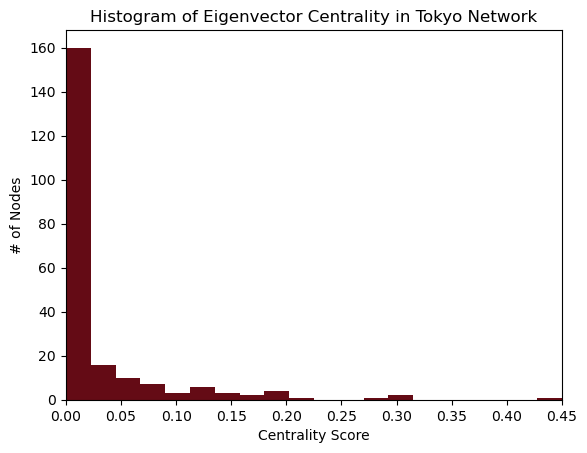

In [6]:
eigenvectorCentrality = nx.eigenvector_centrality(ToykoNetwork)
inside = [(f"{c:0.2f}",v) for v,c in eigenvectorCentrality.items()]

#graph centrality
xs = [float(x) for x,y in inside]
plt.hist(xs, bins=20, color='#640B15')
plt.xlim(0,.45)
plt.title("Histogram of Eigenvector Centrality in Tokyo Network")
plt.xlabel("Centrality Score")
plt.ylabel("# of Nodes")
plt.show()

#display centrality scores
#sorted(inside, reverse = True)



# Calculate Eigenvalues

In [15]:
L = nx.normalized_laplacian_matrix(ToykoNetwork)
e = numpy.linalg.eigvals(L.A)
print("Largest Eigenvalue:",max(e))

Largest Eigenvalue: (1.9949031806190038+0j)


<class 'networkx.utils.decorators.argmap'> compilation 16:4: FutureWarning: normalized_laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


# Chromatic Number

In [10]:
chromaticNumber = nx.coloring.greedy_color(ToykoNetwork, strategy="largest_first")
#print(chromaticNumber)

In [8]:
# create new csv with just node id and color
with open('tokyoColor.csv', 'w') as csvFile:
    csvWriter = csv.writer(csvFile)
    for key in chromaticNumber.keys():
        csvWriter.writerow([key, chromaticNumber[key]])